In [145]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [146]:
cars_data = pd.read_csv('C:/Users/user/Desktop/ML/Car_Price_Predictor/data/raw/car_data.csv')


In [147]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [148]:
cars_data.drop(columns=['torque'],inplace=True)

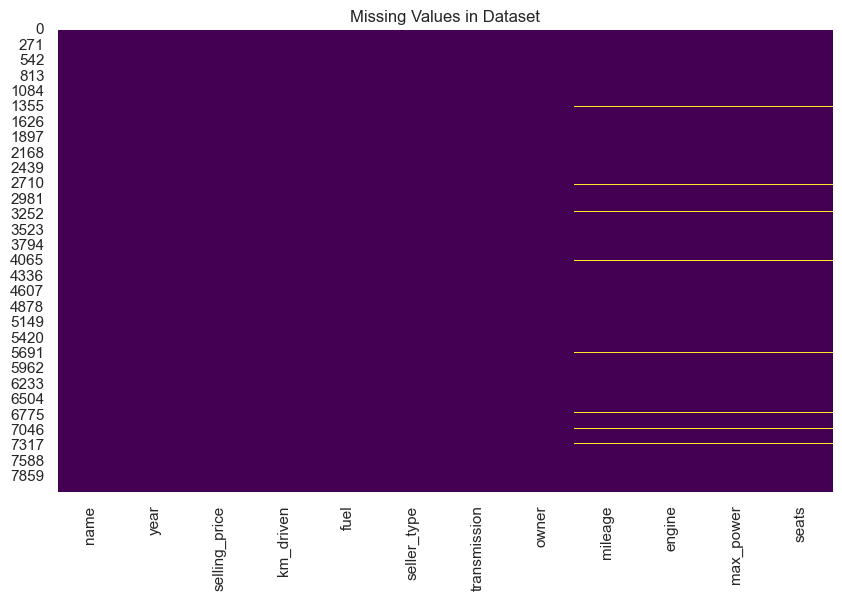

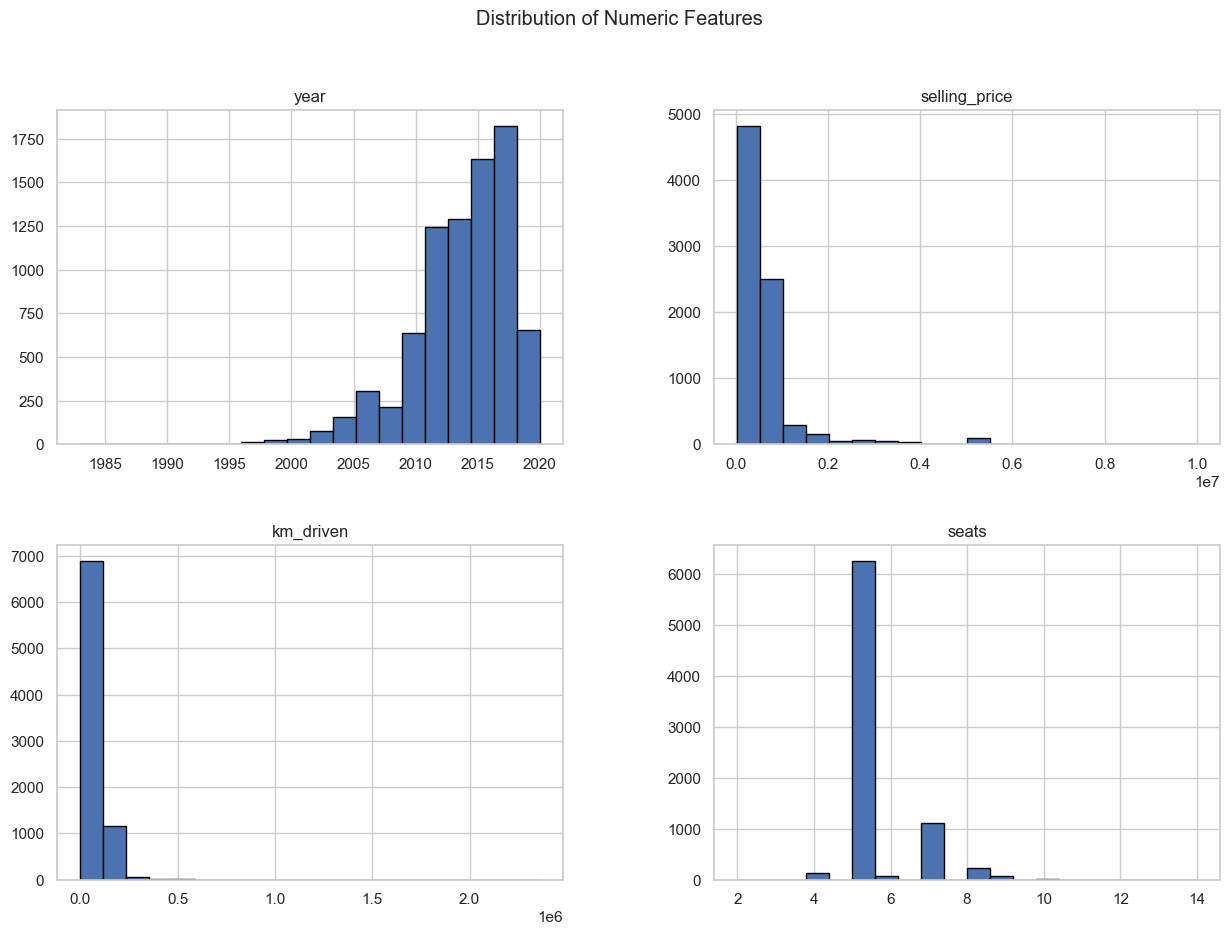

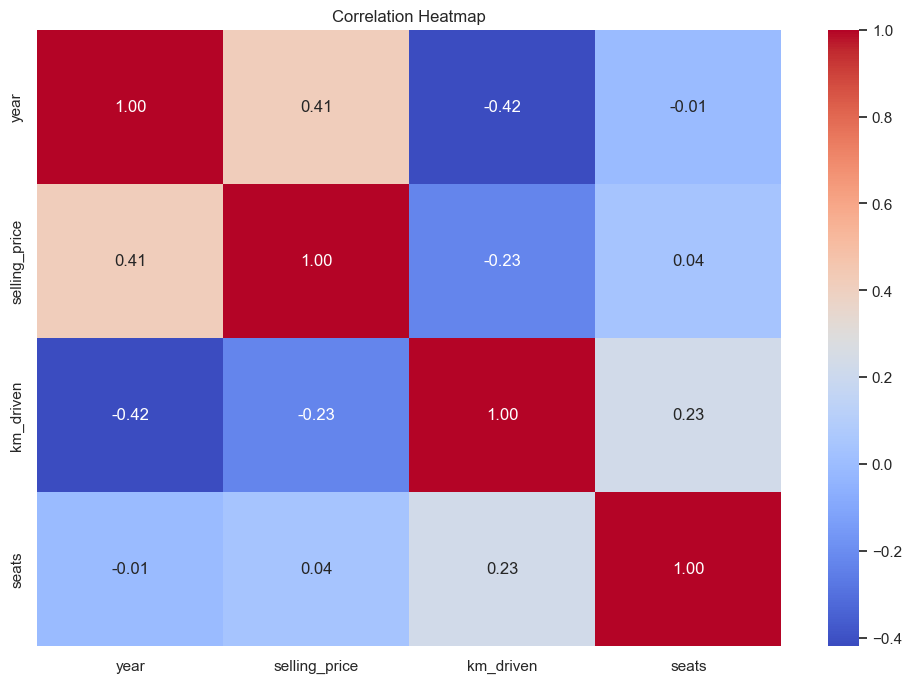

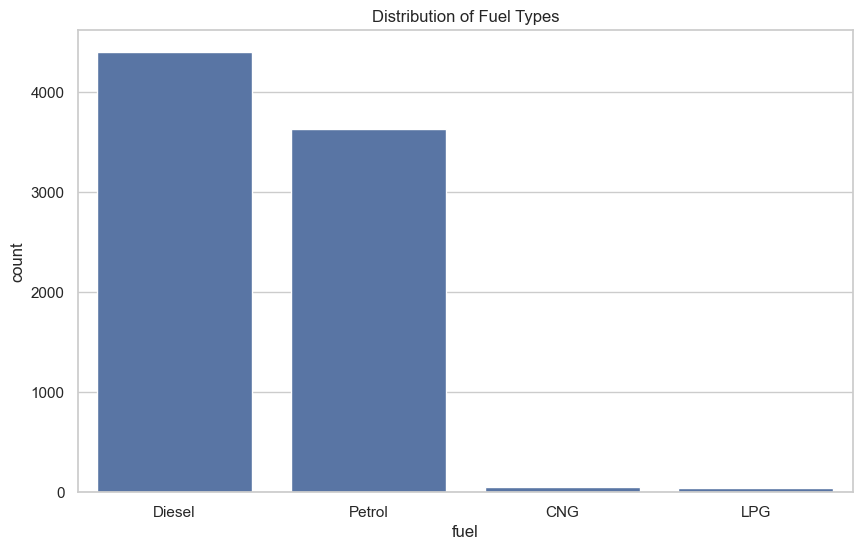

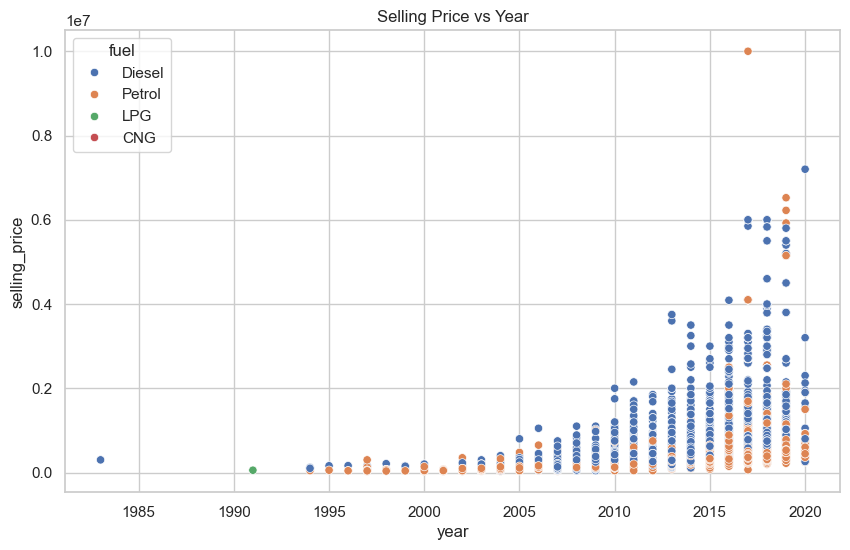

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(cars_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

# Visualize numeric feature distributions
cars_data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cars_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Categorical feature countplot example
plt.figure(figsize=(10, 6))
sns.countplot(data=cars_data, x='fuel', order=cars_data['fuel'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.show()

# Relationship between year and selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars_data, x='year', y='selling_price', hue='fuel')
plt.title('Selling Price vs Year')
plt.show()


In [150]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [151]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [152]:
cars_data.dropna(inplace=True)

In [153]:
cars_data.shape

(7907, 12)

In [154]:
cars_data.duplicated().sum()

np.int64(1189)

In [155]:
cars_data.drop_duplicates(inplace=True)

In [156]:
cars_data.shape

(6718, 12)

In [157]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [158]:
cars_data.info

<bound method DataFrame.info of                                    name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
8122         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
8123                  Hyundai i20 Magna  2013         320000     110000   
8124              Hyundai Verna CRDi SX  2007         135000     119000   
8125             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mil

In [159]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique)
    print("=================\n")

Unique values of name
<bound method Series.unique of 0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
                      ...                
8121    Maruti Wagon R VXI BS IV with ABS
8122           Hyundai i20 Magna 1.4 CRDi
8123                    Hyundai i20 Magna
8124                Hyundai Verna CRDi SX
8125               Maruti Swift Dzire ZDi
Name: name, Length: 6718, dtype: object>

Unique values of year
<bound method Series.unique of 0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8121    2013
8122    2014
8123    2013
8124    2007
8125    2009
Name: year, Length: 6718, dtype: int64>

Unique values of selling_price
<bound method Series.unique of 0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    1

In [160]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip(' ')

In [161]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [162]:
get_brand_name('Maruti Swift Dzire VDI')

'Maruti'

In [163]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [164]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [165]:
cars_data['mileage'] = cars_data['mileage'].apply(get_brand_name)

In [166]:
cars_data['max_power'] = cars_data['max_power'].apply(get_brand_name)

In [167]:
cars_data['engine'] = cars_data['engine'].apply(get_brand_name)

In [168]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique)
    print("=================\n")

Unique values of name
<bound method Series.unique of 0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8121     Maruti
8122    Hyundai
8123    Hyundai
8124    Hyundai
8125     Maruti
Name: name, Length: 6718, dtype: object>

Unique values of year
<bound method Series.unique of 0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8121    2013
8122    2014
8123    2013
8124    2007
8125    2009
Name: year, Length: 6718, dtype: int64>

Unique values of selling_price
<bound method Series.unique of 0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 6718, dtype: int64>

Unique values of km_driven
<bound method Series.unique of 0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
8121     50000
8122     80000
8123    110000
8124    119000
8125   

In [169]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [170]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
       [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
       inplace=True
       )

C:\Users\user\AppData\Local\Temp\ipykernel_27112\1663817759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
C:\Users\user\AppData\Local\Temp\ipykernel_27112\1663817759.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [171]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [172]:
cars_data['transmission'].replace(['Manual','Automatic'],[1,2], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27112\1819818134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['transmission'].replace(['Manual','Automatic'],[1,2], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27112\1819818134.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [173]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [174]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [1,2,3], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27112\1715770685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [1,2,3], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27112\1715770685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [175]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 682.3+ KB


In [176]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [177]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'], [1,2,3,4], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27112\3462554276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'], [1,2,3,4], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27112\3462554276.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [178]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,First Owner,23.4,1248,74,5.0
1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498,103.52,5.0
2,3,2006,158000,140000,2,1,1,Third Owner,17.7,1497,78,5.0
3,4,2010,225000,127000,1,1,1,First Owner,23.0,1396,90,5.0
4,1,2007,130000,120000,2,1,1,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,260000,50000,2,1,1,Second Owner,18.9,998,67.1,5.0
8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396,88.73,5.0
8123,4,2013,320000,110000,2,1,1,First Owner,18.5,1197,82.85,5.0
8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.8,1493,110,5.0


In [179]:
cars_data.reset_index(inplace=True)

In [180]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.4,1248,74,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.7,1497,78,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.0,1396,90,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.9,998,67.1,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.5,1197,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.8,1493,110,5.0


In [181]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [182]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], [1,2,3,4,5], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27112\1358740473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
C:\Users\user\AppData\Local\Temp\ipykernel_27112\1358740473.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ca

In [183]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.4,1248,74,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.7,1497,78,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.0,1396,90,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,2,18.9,998,67.1,5.0
6714,8122,4,2014,475000,80000,1,1,1,2,22.54,1396,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,1,18.5,1197,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,4,16.8,1493,110,5.0


In [184]:
cars_data.drop(columns=['index'], inplace=True)

In [185]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.4,1248,74,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.7,1497,78,5.0
3,4,2010,225000,127000,1,1,1,1,23.0,1396,90,5.0
4,1,2007,130000,120000,2,1,1,1,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,2,1,1,2,18.9,998,67.1,5.0
6714,4,2014,475000,80000,1,1,1,2,22.54,1396,88.73,5.0
6715,4,2013,320000,110000,2,1,1,1,18.5,1197,82.85,5.0
6716,4,2007,135000,119000,1,1,1,4,16.8,1493,110,5.0


In [186]:
input_data = cars_data.drop(columns = ['selling_price'])
output_data = cars_data['selling_price']

In [187]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [188]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(verbose=0)  


In [189]:
model.fit(x_train, y_train)

In [191]:
predict = model.predict(x_test)

In [192]:
predict

array([382555.86413457, 814085.79761487,  47697.43798386, ...,
       732792.01844347, 228797.78572519, 639365.53087808], shape=(1344,))

In [193]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6215,4,2018,15000,2,1,2,1,17.36,1197,81.86,5.0


In [194]:
input_data_model =pd.DataFrame(
    [[1,2010,5000,2,1,1,1,22.05,796,47.3,5.0]],
    columns = ['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']
)

In [195]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2010,5000,2,1,1,1,22.05,796,47.3,5.0


In [196]:
model.predict(input_data_model)

array([179482.28301509])

In [197]:
import pickle as pk